# Template for Transfer Learning Training

## Import Packages

In [ ]:
# !pip uninstall ml_project_util -y
# !pip install git+https://github.com/aris-gk3/ml_project_util.git
#  or
%pip install git+https://github.com/aris-gk3/ml_project_util.git

In [1]:
import tensorflow as tf
import os
from tensorflow.keras import layers, models # type: ignore
from tensorflow.keras.applications import VGG16 # type: ignore
# Local Packages
from ml_project_util.path import path_definition
from ml_project_util.train import train, freeze_layers, unfreeze_head, unfreeze_block
from ml_project_util.quantization_util import quant_model
from ml_project_util.model_evaluation import model_evaluation_precise

## Define the Model

In [4]:
vgg_base = VGG16(weights='imagenet', include_top=False, input_shape=(224, 224, 3))
model = models.Sequential()
for layer in vgg_base.layers:
    model.add(layer)
# Adding the new head
model.add(layers.GlobalAveragePooling2D())
model.add(layers.Dense(256, activation='relu'))
model.add(layers.Dropout(0.5))
model.add(layers.Dense(37, activation='softmax'))

## Add/Get env paths

In [3]:
# dict = path_definition(ds_rel_path='catsdogsconv/CatsDogs')
dict = path_definition()
BASE_PATH = dict['BASE_PATH']
PATH_DATASET = dict['PATH_DATASET']
PATH_TEST = dict['PATH_TEST']
PATH_RAWDATA = dict['PATH_RAWDATA']
PATH_JOINEDDATA = dict['PATH_JOINEDDATA']
PATH_SAVEDMODELS = dict['PATH_SAVEDMODELS']

## Train the Model

- block1_conv1 (Conv2D), Trainable: False
- block1_conv2 (Conv2D), Trainable: False
- block1_pool (MaxPooling2D), Trainable: False
- block2_conv1 (Conv2D), Trainable: False
- block2_conv2 (Conv2D), Trainable: False
- block2_pool (MaxPooling2D), Trainable: False
- block3_conv1 (Conv2D), Trainable: False
- block3_conv2 (Conv2D), Trainable: False
- block3_conv3 (Conv2D), Trainable: False
- block3_pool (MaxPooling2D), Trainable: False
- block4_conv1 (Conv2D), Trainable: False
- block4_conv2 (Conv2D), Trainable: False
- block4_conv3 (Conv2D), Trainable: False
- block4_pool (MaxPooling2D), Trainable: False
- block5_conv1 (Conv2D), Trainable: False
- block5_conv2 (Conv2D), Trainable: False
- block5_conv3 (Conv2D), Trainable: False
- block5_pool (MaxPooling2D), Trainable: False
- global_average_pooling2d_1 (GlobalAveragePooling2D), Trainable: False
- dense_2 (Dense), Trainable: False
- dropout_1 (Dropout), Trainable: False
- dense_3 (Dense), Trainable: False


- block1_conv1 (Conv2D), Trainabl

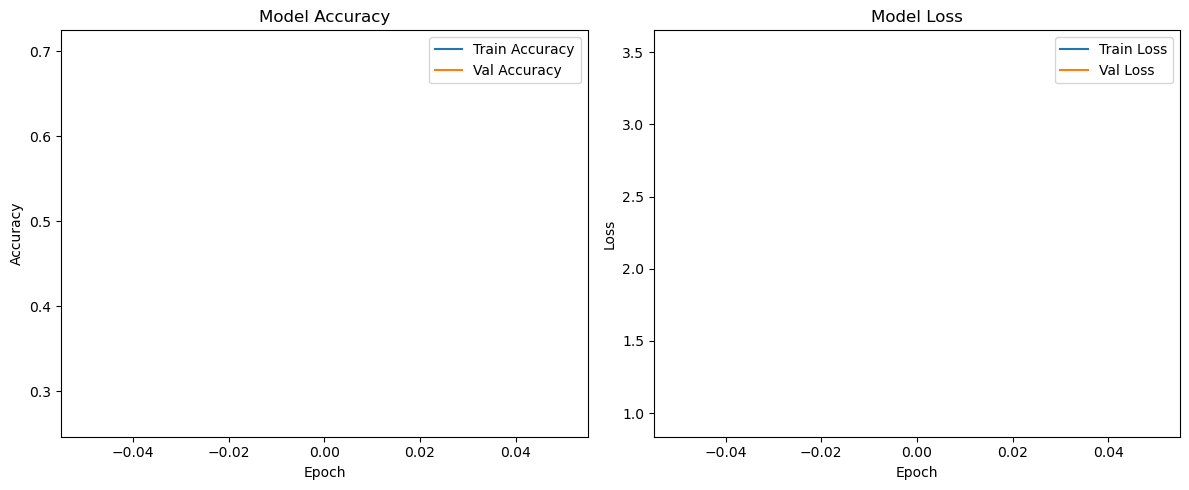

In [5]:
epochs = 1
lr = 1e-3
optimizer = 'Adam'
name = 'OP1_P1'

# If I want to change data augmentation strateguy
# data_augmentation = tf.keras.Sequential([
#     layers.RandomFlip('horizontal'),
#     layers.RandomRotation(0.1),             # 10% random rotation
#     layers.RandomZoom(0.1),                 # 10% zoom
#     layers.RandomTranslation(0.1, 0.1),     # Random height and width shift
#     layers.RandomBrightness(0.2)
# ])

# data_augmentation = tf.keras.Sequential([
#     tf.keras.layers.RandomFlip("horizontal_and_vertical"),
#     tf.keras.layers.RandomRotation(0.25),  # Larger rotation range is useful
#     tf.keras.layers.RandomZoom(0.2),
#     tf.keras.layers.RandomTranslation(0.2, 0.2),
#     tf.keras.layers.RandomContrast(0.2),  # Satellite images vary in lighting/contrast
# ])

data_augmentation = tf.keras.Sequential([
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
    layers.RandomZoom(0.1),
    layers.RandomContrast(0.1)
], name="data_augmentation")

freeze_layers(model, verbose=1)
unfreeze_head(model, verbose=1)
train(model, epochs, lr, optimizer, name, is_binary=0, plot=True, augmentation_pipeline=data_augmentation)

In [5]:
model.loss

'binary_crossentropy'

In [4]:
model_evaluation_precise(model)

Found 420 files belonging to 21 classes.


ValueError: When passing `label_mode="binary"`, there must be exactly 2 class_names. Received: class_names=['agricultural', 'airplane', 'baseballdiamond', 'beach', 'buildings', 'chaparral', 'denseresidential', 'forest', 'freeway', 'golfcourse', 'harbor', 'intersection', 'mediumresidential', 'mobilehomepark', 'overpass', 'parkinglot', 'river', 'runway', 'sparseresidential', 'storagetanks', 'tenniscourt']

In [ ]:
epochs = 15
lr = 1e-3
optimizer = 'Adam'
name = 'UC1_P1'

# If I want to change data augmentation strateguy
# data_augmentation = tf.keras.Sequential([
#     layers.RandomFlip('horizontal'),
#     layers.RandomRotation(0.1),             # 10% random rotation
#     layers.RandomZoom(0.1),                 # 10% zoom
#     layers.RandomTranslation(0.1, 0.1),     # Random height and width shift
#     layers.RandomBrightness(0.2)
# ])

data_augmentation = tf.keras.Sequential([
    tf.keras.layers.RandomFlip("horizontal_and_vertical"),
    tf.keras.layers.RandomRotation(0.25),  # Larger rotation range is useful
    tf.keras.layers.RandomZoom(0.2),
    tf.keras.layers.RandomTranslation(0.2, 0.2),
    tf.keras.layers.RandomContrast(0.2),  # Satellite images vary in lighting/contrast
])

freeze_layers(model, verbose=1)
unfreeze_head(model, verbose=1)
train(model, epochs, lr, optimizer, name, is_binary=1, plot=True, augmentation_pipeline=data_augmentation)

In [ ]:
epochs = 20
lr = 1e-4
optimizer = 'Adam'
name = 'UC1_P2'

freeze_layers(model, verbose=1)
unfreeze_head(model, verbose=1)
train(model, epochs, lr, optimizer, name, is_binary=1, plot=True, augmentation_pipeline=data_augmentation)

In [ ]:
epochs = 20
lr = 1e-5
optimizer = 'Adam'
name = 'UC1_P3'

freeze_layers(model, verbose=1)
unfreeze_head(model, verbose=1)
train(model, epochs, lr, optimizer, name, is_binary=1, plot=True, augmentation_pipeline=data_augmentation)